(fisher)=
# Maximum Likelihood and Fisher Information

In [278]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import norm
from scipy.optimize import minimize
import seaborn as sns

# Vector Graphics
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

<div align="justify">

The notion of likelihood is one of the key elements of statistical inference in general, and maximum likelihood estimation is an omnipresent principle in machine learning as well. Indeed, many learning algorithms, including those used to train deep neural networks, realize model induction as likelihood maximization. Besides, there is a close connection between likelihood-based and Bayesian inference, as in many cases, the former is effectively equivalent to the latter with a uniform prior --- disregarding, of course, important conceptual differences and philosophical foundations.  

</div>

<div align="justify">

In the Bayesian approach, learning essentially involves updating the prior distribution with the posterior distribution:

$$
p(h \vert \cD) \, = \frac{p(h) \cdot p(\cD \vert h)}{p(\cD)} \,  \propto \, p(h) \cdot p(\cD \vert h) \, ,
$$

where $p(h \vert \cD)$ is the posterior distribution, $p(h)$ is the prior distribution, $p(\cD \vert h)$ is the likelihood of the data given the hypothesis, $p(\cD)$ is the evidence, which serves as a normalizing constant. 

Uniform prior assumes that all possible values of the parameter(s) being estimated are equally likely, reflecting a state of complete ignorance or lack of prior knowledge about the parameter(s). So a uniform prior does not impose any preference on the values of the parameter, making the posterior distribution solely dependent on the likelihood function. Therefore, in the case of a uniform prior, maximizing the posterior distribution is equivalent to maximizing the likelihood function. We use an example to illustrate this process: 

</div>

In [389]:
data = {'heads': 7, 'tails': 3}
total_trial = data['heads'] + data['tails'] 
num_head = data['heads']

# 1. Maximum Likelihood Estimation (MLE)
mle_estimate = num_head / total_trial 
print("MLE Estimate: ", mle_estimate)

# 2. Bayesian Inference (with Uniform Prior)
theta_values = np.linspace(0, 1, 50)  # Possible values of parameter θ

prior = np.ones(len(theta_values)) / len(theta_values)  # Uniform prior to 1/50

likelihood = binom.pmf(num_head, total_trial, theta_values)

posterior = likelihood * prior
posterior /= np.sum(posterior)

# Find θ corresponding to the maximum of the posterior distribution
bayesian_estimate = theta_values[np.argmax(posterior)]
print("Bayesian Inference Estimate (with uniform prior): ", bayesian_estimate)

MLE Estimate:  0.7
Bayesian Inference Estimate (with uniform prior):  0.6938775510204082


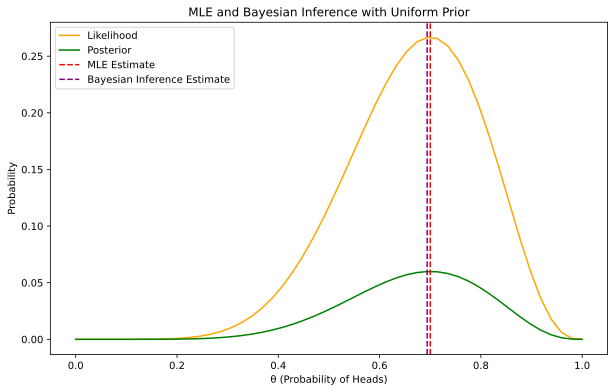

In [390]:
plt.figure(figsize=(10, 6))
plt.plot(theta_values, likelihood, label='Likelihood', color='orange')
plt.plot(theta_values, posterior, label='Posterior', color='green')
plt.axvline(mle_estimate, color='red', linestyle='--', label='MLE Estimate')
plt.axvline(bayesian_estimate, color='purple', linestyle='--', label='Bayesian Inference Estimate')
plt.xlabel('θ (Probability of Heads)')
plt.ylabel('Probability')
plt.legend()
plt.title('MLE and Bayesian Inference with Uniform Prior')
plt.show()

<div align="justify">

Adopting the common perspective of classical (frequentist) statistics, consider a data-generating process specified by a parametrized family of probability measures $\Prob_{\vec{\theta}}$, where $\vec{\theta} \in \Theta$ is a parameter vector. Let $f_{\vec{\theta}}( \cdot )$ denote the density (or mass) function of $\Prob_{\vec{\theta}}$, i.e., $f_{\vec{\theta}}( X)$ is the probability to observe the data $X$ when sampling from $\Prob_{\vec{\theta}}$. An important problem in statistical inference is to estimate the parameter $\vec{\theta}$, i.e., to identify the underlying data-generating process $\Prob_{\vec{\theta}}$, on the basis of a set of observations $\mathcal{D} = \{ X_1, \ldots , X_N \}$, and maximum likelihood estimation (MLE) is a general principle for tackling this problem. More specifically, the MLE principle prescribes to estimate $\vec{\theta}$ by the maximizer of the likelihood function, or, equivalently, the log-likelihood function. Assuming that $X_1, \ldots , X_N$ are independent, and hence that $\mathcal{D}$ is distributed according to $( \Prob_{\vec{\theta}})^N$, the log-likelihood function is given by

$$
\ell_N(\vec{\theta}) \sum_{n=1}^N \log f_{\vec{\theta}}(X_n ) \, .
$$

</div>

<div align="justify">

Here we have an example to exlain this. First we generate some sample data from a normal distribution, given the true_mu and true_sigma.

</div>

In [279]:
np.random.seed(0)
true_mu = 2
true_sigma = 1
data = np.random.normal(true_mu, true_sigma, 100)

<div align="justify">

 Then we need to define the probablity model. For a normal distribution, this model is characterized by its probability density function(PDF), $f(X)$, which describes the likelihood of observing the data given specific values of the mean ($μ$) and standard deviation ($σ$). Once this has been defined, the next task is to construct the log-likelihood function. The log probability density function (log PDF), log $f(X)$, of a normal distribution is essential for MLE because it transforms the product of probabilities into a sum, which is easier to manage computationally and helps avoid numerical underflow issues. This function is represented as the negative sum of the log probabilities for all observed data points:

</div>

In [280]:
def neg_log_likelihood(params, data):
    mu, sigma = params
    if sigma <= 0:
        return np.inf
    return -np.sum(norm.logpdf(data, loc=mu, scale=sigma))

<div align="justify">

To find the parameters that maximize the log-likelihood (or minimize the negative log-likelihood), we employ an optimization technique. In the code, this is done using the minimize function:

</div>

In [281]:
initial_guess = [0, 1]
bounds = [(None, None), (1e-6, None)]  
result = minimize(neg_log_likelihood, initial_guess,args=(data,), method='L-BFGS-B', bounds=bounds)

estimated_mu, estimated_sigma = result.x
print(f"True μ: {true_mu}")
print(f"True σ: {true_sigma}")
print(f"Estimated μ: {estimated_mu}")
print(f"Estimated σ: {estimated_sigma}")

True μ: 2
True σ: 1
Estimated μ: 2.0598080392151137
Estimated σ: 1.0078822999099222


<div align="justify">

An important result of mathematical statistics states that the distribution of the maximum likelihood estimate $\hat{\vec{\theta}}$ is asymptotically normal, i.e., converges to a normal distribution as $N \rightarrow \infty$. More specifically, $\sqrt{N}(\hat{\vec{\theta}} - \vec{\theta})$ converges to a normal distribution with mean 0 and covariance matrix $\mathcal{I}_N^{-1}(\vec{\theta})$, where 

$$
\mathcal{I}_N(\vec{\theta}) =  - \left[
\evalue_{\vec{\theta}} \left( \frac{\partial^2 \ell_N}{\partial \theta_i \, \partial \theta_j} \right) 
\right]_{1 \leq i,j \leq N}
$$

is the *Fisher information matrix* (the negative Hessian of the log-likelihood function at $\vec{\theta}$). This result has many implications, both theoretically and practically. For example, the Fisher information plays an important role in the Cramér-Rao bound and provides a lower bound to the variance of any unbiased estimator of $\vec{\theta}$ ({cite:t}`frie_sf`).

</div>

In [382]:
np.random.seed(0)

sample_sizes_N = [10, 100, 1000, 5000]

repeats = 100

standardized_estimates = {N: [] for N in sample_sizes_N}
fisher_information_matrices = {N: [] for N in sample_sizes_N}
covariance_matrices = {N: None for N in sample_sizes_N}
avg_fisher_matrices = {N: None for N in sample_sizes_N}

def fisher_information_matrix(sigma, N):
    I_μμ = N / sigma**2
    return np.array([[I_μμ]])

for N in sample_sizes_N:
    for i in range(repeats):
        data = np.random.normal(true_mu, true_sigma, N)
        initial_guess = [np.mean(data), np.std(data)]
        result = minimize(neg_log_likelihood, initial_guess,args=(data,), method='BFGS')
        estimated_mu = result.x[0]
        estimated_sigma = result.x[1]
        
        standardized_estimate = np.sqrt(N) * (estimated_mu - true_mu)
        standardized_estimates[N].append(standardized_estimate)
        
        fisher_matrix = fisher_information_matrix(estimated_sigma, N)
        fisher_information_matrices[N].append(fisher_matrix)

    avg_fisher_matrix = np.mean(fisher_information_matrices[N], axis=0)
    avg_fisher_matrices[N] = avg_fisher_matrix
    covariance_matrix = np.linalg.inv(avg_fisher_matrix)
    covariance_matrices[N] = covariance_matrix

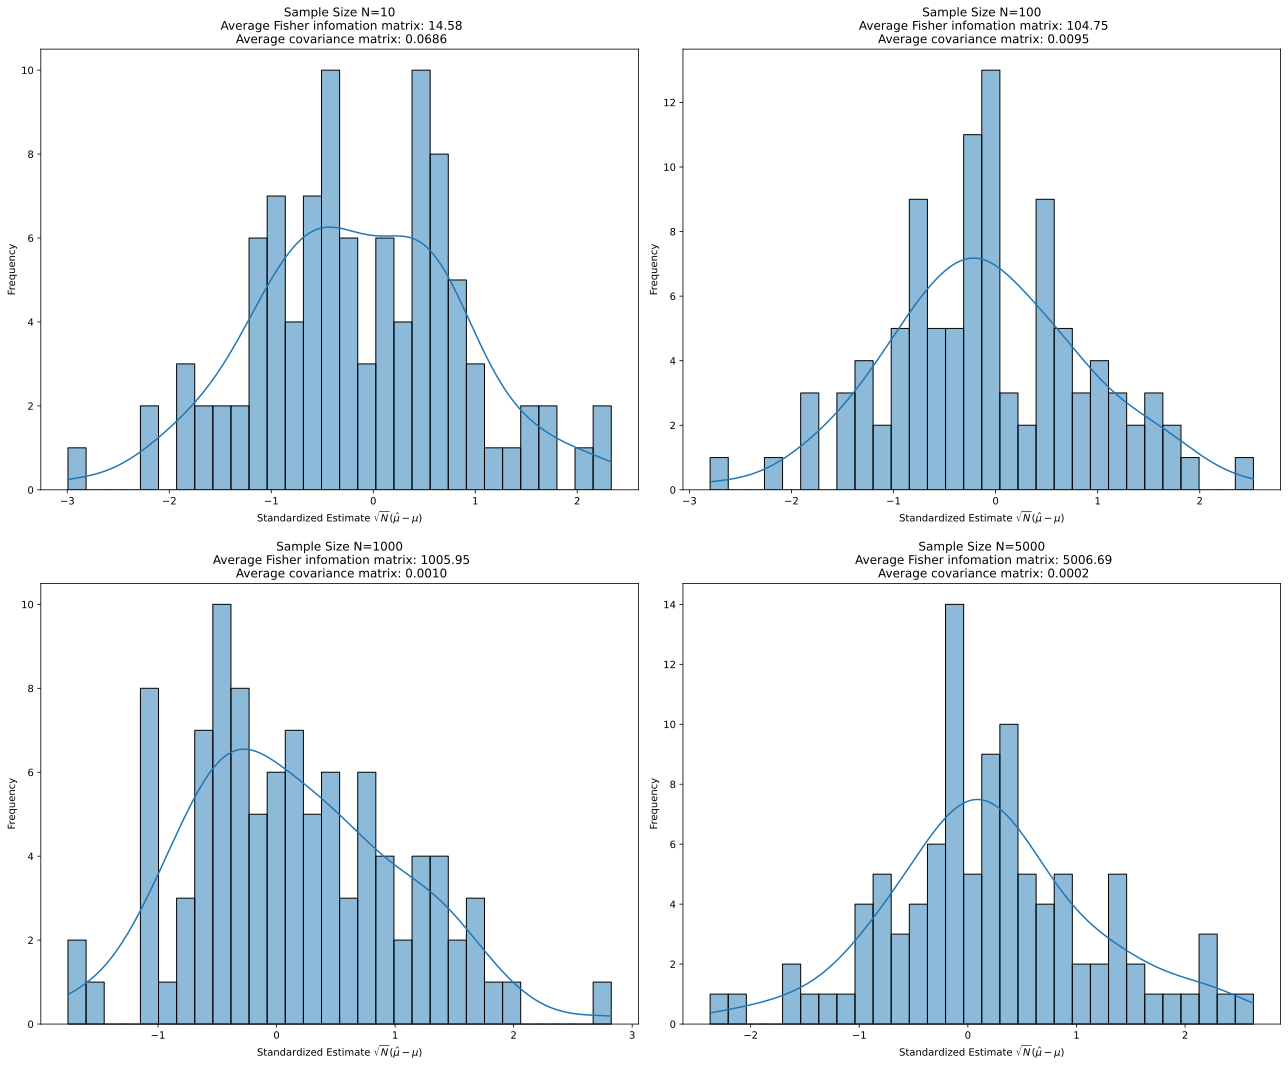

In [383]:
fig, axes = plt.subplots(2, 2, figsize=(18, 15))

for ax, N in zip(axes.flatten(), sample_sizes_N):
    sns.histplot(standardized_estimates[N], kde=True, ax=ax, bins=30)
    
    x_vals = np.linspace(min(standardized_estimates[N]), max(standardized_estimates[N]), 100)

    ax.set_title(f'Sample Size N={N}\n Average Fisher infomation matrix: {avg_fisher_matrices[N][0,0]:.2f}\n Average covariance matrix: {covariance_matrices[N][0,0]:.4f}')
    ax.set_xlabel("Standardized Estimate $\sqrt{N} (\hat{\mu} - \mu)$")
    ax.set_ylabel('Frequency')
    # ax.legend()

plt.tight_layout()
plt.show()

<div align="justify">

Moreover, the Fisher information matrix allows for constructing (approximate) *confidence regions* for the sought parameter $\vec{\theta}$ around the estimate $\hat{\vec{\theta}}$ (approximating[^footNoteIdentifier1] $\mathcal{I}_N(\vec{\theta})$ by $\mathcal{I}_N(\hat{\vec{\theta}})$). Obviously, the larger this region, the higher the (epistemic) uncertainty about the true model $\vec{\theta}$. Roughly speaking, the size of the confidence region is in direct correspondence with the "peakedness" of the likelihood function around its maximum. If the likelihood function is peaked, small changes of the data do not change the estimation $\hat{\vec{\theta}}$ too much, and the learner is relatively sure about the true model (data-generating process). As opposed to this, a flat likelihood function reflects a high level of uncertainty about $\vec{\theta}$, because there are many parameters that are close to  $\hat{\vec{\theta}}$ and have a similar likelihood. 

Here we have an example with smaller sample-sizes to illustrate the relationshio between the "peakedness" of the likelihood function and confidence region.

</div>

In [378]:
sample_sizes_N = [5, 50]
repeats = 1

fisher_information_matrices = {N: [] for N in sample_sizes_N}
likelihood_curves = {}
ci_bounds = {}

# Function to calculate likelihood from negative log likelihood
def likelihood_function(params):
    return np.exp(-neg_log_likelihood(params))

for N in sample_sizes_N:
    for i in range(repeats):
        data = np.random.normal(true_mu, true_sigma, N)
        initial_guess = [np.mean(data), np.std(data, ddof=1)]
        result = minimize(neg_log_likelihood, initial_guess, args=(data,), method='BFGS')
        estimated_sigma = result.x[1]
        
        fisher_matrix = fisher_information_matrix(estimated_sigma, N)
        fisher_information_matrices[N].append(fisher_matrix)
        
    avg_fisher_matrix = np.mean(fisher_information_matrices[N], axis=0)
    covariance_matrix = np.linalg.inv(avg_fisher_matrix)
    
    # Calculate the likelihood curve for the given range of mu values
    mu_range = np.linspace(true_mu - 5 * true_sigma, true_mu + 5 * true_sigma, 300)
    likelihood_curve = [np.exp(log_likelihood(mu, data, true_sigma)) for mu in mu_range]
    likelihood_curves[N] = (mu_range, likelihood_curve)
    
    # Calculate the 95% confidence interval for mu
    ci_lower = true_mu - 1.96 * np.sqrt(covariance_matrix[0, 0])
    ci_upper = true_mu + 1.96 * np.sqrt(covariance_matrix[0, 0])
    ci_bounds[N] = (ci_lower, ci_upper)


/opt/anaconda3/envs/toolbox/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0
/opt/anaconda3/envs/toolbox/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0


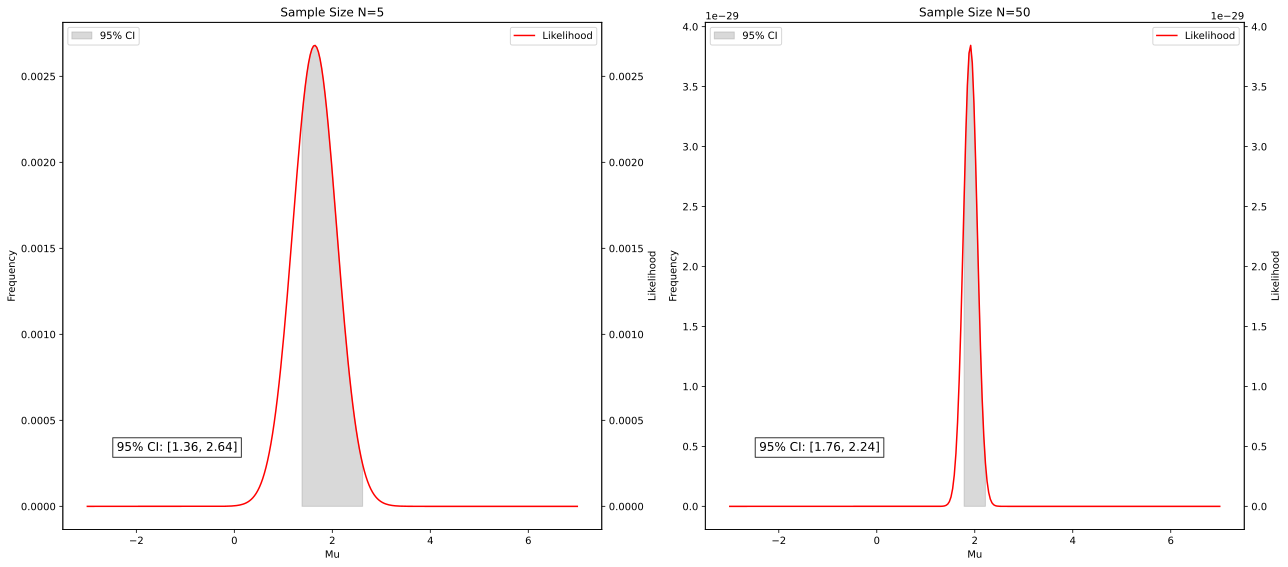

In [379]:
fig, axes = plt.subplots(1, len(sample_sizes_N), figsize=(18, 8))

for ax, N in zip(axes.flatten(), sample_sizes_N):
    mu_range, likelihood_curve = likelihood_curves[N]
    ci_lower, ci_upper = ci_bounds[N]
    
    ax2 = ax.twinx()
    ax2.plot(mu_range, likelihood_curve, color='red', label='Likelihood')
    ax.fill_between(mu_range, 0, likelihood_curve, where=(mu_range >= ci_lower) & (mu_range <= ci_upper), color='gray', alpha=0.3, label='95% CI')
    ax.set_title(f'Sample Size N={N}')
    ax.set_xlabel("Mu")
    ax.set_ylabel('Frequency')
    ax2.set_ylabel('Likelihood')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

    ci_text = f'95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]'
    ax.text(0.1, 0.15, ci_text, transform=ax.transAxes, fontsize=12,
            verticalalignment='bottom', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


<div align="justify">

In a machine learning context, where parameters $\vec{\theta}$ may identify hypotheses $h = h_{\vec{\theta}}$, a confidence region for the former can be seen as a representation of epistemic uncertainty about $h^*$, or, more specifically, approximation uncertainty. To obtain a quantitative measure of uncertainty, the Fisher information matrix can be summarized in a scalar statistic, for example the trace (of the inverse) or the smallest eigenvalue. Based on corresponding measures, Fisher information has been used, among others, for optimal statistical design ({cite:t}`puke_od`) and active machine learning ({cite:t}`sour_ap18`). 

</div>

[^footNoteIdentifier1]:Of course, the validity of this "plug-in" estimate requires some formal assumptions.